<a href="https://colab.research.google.com/github/Neha120903/DeepLearning_Pytorch/blob/1_May/Classification_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Network classificatipn with pytorch

Classification is a problem of predictiing whether something is one thing or another(there can be multiple things as option)

In [1]:
##1. Make classification data and get it ready
import sklearn

In [2]:
from sklearn.datasets import make_circles
# make 1000 samples
n_samples=1000
# create circles
X,y= make_circles(n_samples, noise=0.03,random_state=42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(X[:5])
print(y[:5])

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
[1 1 1 1 0]


In [5]:
# make dataframe of circle data
import pandas as pd
circles=pd.DataFrame({"X1": X[:,0], "X2":X[:,1], "Label" :y})
circles.head(10)

,X1,X2,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


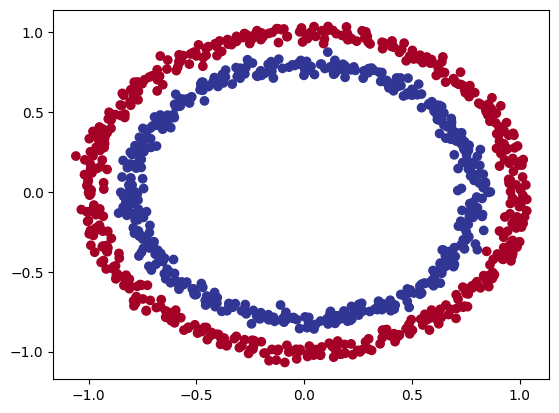

In [6]:
# visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

**Note**: The data we are working if often referred to as toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals

###1.1 Check input and output shapes

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# View the first example of features and labels
X_sample=X[0]
y_sample=y[0]
print("values for one sample x", X_sample)
print("value for one sample y", y_sample)
print("shapes of x and y",X_sample.shape,y_sample.shape)

values for one sample x [0.75424625 0.23148074]
value for one sample y 1
shapes of x and y (2,) ()


###1.2 Turn data into tensors and create train and test splits

In [9]:

import torch
torch.__version__


'2.6.0+cu124'

In [10]:
type(X),X.dtype

(numpy.ndarray, dtype('float64'))

In [11]:
# Turn data into tensors
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [12]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [13]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=32)
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

## 2. Building a model
Let's build a model to classify our blue and red dots.
to do so we want to

1.Setup device agonistic code so our code willr un on an accelerator(GPU) if there is one

2. Construct a model(by subclassing `nn.Module`)

3.Define a loss function and optimizer

4.Create a training and test loop

In [14]:
# import pytorch and nn
import torch
from torch import nn

# device agnostic doe
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

No we have setup device agnostic code let's create a model that-
1. Subclass nn.Module (almost all models in pytorch subclass nn.Module )

2.Create nn.Linear() layers that are capable to handle our data

3.define a forward method that outlines the forward pass (or forward computation) of the model

4.Instantiate an instance of our model class and send it to target device

In [15]:
# 1.Construct a mdoel that subclasses nn.Module
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    # Create 2 nnlayers capable of handling the shape of our data
    self.layer_1=nn.Linear(in_features= 2,out_features=5)  # agr hme srf ek layer chahiye to out_feature m 1 krnge vrna hm use kch bhi rkh skte h yes
    self.layer_2=nn.Linear(in_features=5,out_features=1)  #take in 5 features from previous layer and outputs a single feature(same shape as y)
  #define a forward method that outlines the foward pass
  def forward(self,x):
    return self.layer_2(self.layer_1(x)) #x->layer 1->layer 2 -> output
# Instantiate an instance of our model class and send it to target device
model_0=CircleModel().to(device)
model_0


CircleModel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
next(model_0.parameters()).device

device(type='cpu')

In [17]:
# Let's replicate the model above using nn.Sequential()
model_1=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)
model_1

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.1092, -0.1181],
                      [ 0.4071,  0.6053],
                      [ 0.4803,  0.4427],
                      [-0.2691, -0.4133],
                      [-0.4080, -0.1231]])),
             ('layer_1.bias',
              tensor([-0.5243, -0.1596,  0.6782,  0.3763,  0.5705])),
             ('layer_2.weight',
              tensor([[-0.2573, -0.0434, -0.3144, -0.2463,  0.3355]])),
             ('layer_2.bias', tensor([-0.3285]))])

In [19]:
model_1.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0194, -0.5004],
                      [ 0.6028,  0.4919],
                      [ 0.6691,  0.4932],
                      [-0.5547, -0.2239],
                      [-0.1179, -0.0898]])),
             ('0.bias', tensor([-0.6630,  0.2151,  0.5664,  0.0515,  0.2322])),
             ('1.weight',
              tensor([[-0.0861,  0.0625, -0.0409, -0.1540, -0.2329]])),
             ('1.bias', tensor([0.1650]))])

In [20]:
# Make predictions
with torch.inference_mode():
  untrained_preds=model_0(X_test.to(device))
print("length of predictions ",len(untrained_preds),"shape: ",untrained_preds.shape)
print("\nfirst 10 predictions ",torch.round(untrained_preds[:10]))
print("\nfrist 10 labels from y_test",y_test[:10])

length of predictions  200 shape:  torch.Size([200, 1])

first 10 predictions  tensor([[-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-1.],
        [-0.]])

frist 10 labels from y_test tensor([0., 1., 0., 0., 1., 0., 1., 0., 1., 1.])


### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use
Again this is problem specific

for eg- for regression you might want to MAE/MSE

For classification you might want binary cross entrpy or categorical cross entropy(cross enyripy)
what is binary cross entropy?

As reminder the loss function measures how wrong your predictions are

what is logit in deep learning

and for optimizer two of the mnost common and useful are SGD and Adam, however, pytorch as many more built in.

for loss function we are going to use torch.nn.BCEWithLogitsLoss() for more on what binary cross entripy(BCE)

# why we are using this with logits


In [21]:
# setup loss function
# loss_fn=nn.BCELoss() # this requires input to have gone through the sigmoid activation function prior input to BCELoss

loss_fn= nn.BCEWithLogitsLoss()  # this has sigmoid activation function built in

optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)


In [22]:
# Calculate accuracy - outof 100 examoles what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc



##3.Train Model

To train our model, we are going to need to build a training loop

1.Forward pass

2.calculate loss

3.optimizer zerograd

4.loss backward(back propagation)

5.optimizer step(gradient descent)

###3.1 Going from raw logits -> prediction probabilities -> prediction labesl

Our model outputs are going to be raw logits.

We can convert these logits into prediciton probabilities byu passing them to some kind of acivation function (e.g. sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to prediction lables by eihter rounding them or taking the argmax()

In [23]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits=model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0287],
        [-0.2926],
        [-0.0769],
        [-0.2310],
        [-0.0784]])

In [24]:
y_test[:5]

tensor([0., 1., 0., 0., 1.])

In [25]:
# use the sigmoid activation fucntion on our model logits to turn them into prediction probabilites
y_pred_probs= torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4928],
        [0.4274],
        [0.4808],
        [0.4425],
        [0.4804]])

For our prediction probability values, we need to perform a range style rounding on them:
y_pred_probs >=0.5, y=1

y_pred_probs<0.5, y=0

In [26]:
# Find the predicted labels
y_preds=torch.round(y_pred_probs)
y_pred_labels=torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
# check for equality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))
# get rid of extra dimension by squeeze()
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

In [27]:
y_test[:5]

tensor([0., 1., 0., 0., 1.])

###3.2 Building a training and tetsing loop


In [28]:
torch.manual_seed(42)

# set the numnber pof epoch
epochs=100
# put datat to target device
X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

# Building trainig and evaluation loop
for epoch in range(epochs):
  # training
  model_0.train()

  #1.forward pass
  y_logits=model_0(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))  #turn logits inot preb probs and then to pred labels

  # 2.Loss and accuracy
  loss=loss_fn(y_logits,y_train) #nn.BCEWithLogits expects raw logits
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

  # Optimizer zero grad
  optimizer.zero_grad()
  # Loss backward
  loss.backward()
  # optimizer step(gradient descent)
  optimizer.step()

  # Testing
  model_0.eval()
  with torch.inference_mode():
    # 1.forward pass
    test_logits=model_0(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    # 2.calculate test loss
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)

  # print out what's happening
  if epoch%10==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss: .5f}, Test acc:{test_acc:.2f}%")

Epoch: 0 | Loss: 0.70741, Acc: 49.88% | Test Loss:  0.71007, Test acc:50.00%
Epoch: 10 | Loss: 0.69854, Acc: 47.00% | Test Loss:  0.70293, Test acc:46.50%
Epoch: 20 | Loss: 0.69587, Acc: 48.62% | Test Loss:  0.70064, Test acc:48.00%
Epoch: 30 | Loss: 0.69495, Acc: 49.50% | Test Loss:  0.69961, Test acc:48.50%
Epoch: 40 | Loss: 0.69453, Acc: 50.50% | Test Loss:  0.69894, Test acc:45.50%
Epoch: 50 | Loss: 0.69429, Acc: 51.25% | Test Loss:  0.69840, Test acc:45.50%
Epoch: 60 | Loss: 0.69411, Acc: 51.38% | Test Loss:  0.69795, Test acc:45.50%
Epoch: 70 | Loss: 0.69398, Acc: 51.12% | Test Loss:  0.69758, Test acc:45.50%
Epoch: 80 | Loss: 0.69386, Acc: 51.00% | Test Loss:  0.69726, Test acc:45.50%
Epoch: 90 | Loss: 0.69377, Acc: 50.75% | Test Loss:  0.69699, Test acc:45.50%


##4.Make Predictions and evaluate the model

From the metrics it lookis like our model is not learning anythong

So to inspect it let's make some predictions and make them visualize

To  do so we are going to import a function called plot_decision_boundary()



In [29]:
import requests
from pathlib import Path

# download helper functions from learn pytirch repo(if it is not already downloaded)

if Path("heleper_functions.py").is_file():
  print("helper_funcitons.py already exists, skipping dwonload")
else:
  print("Dowload the helper function")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py","wb")as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

Dowload the helper function


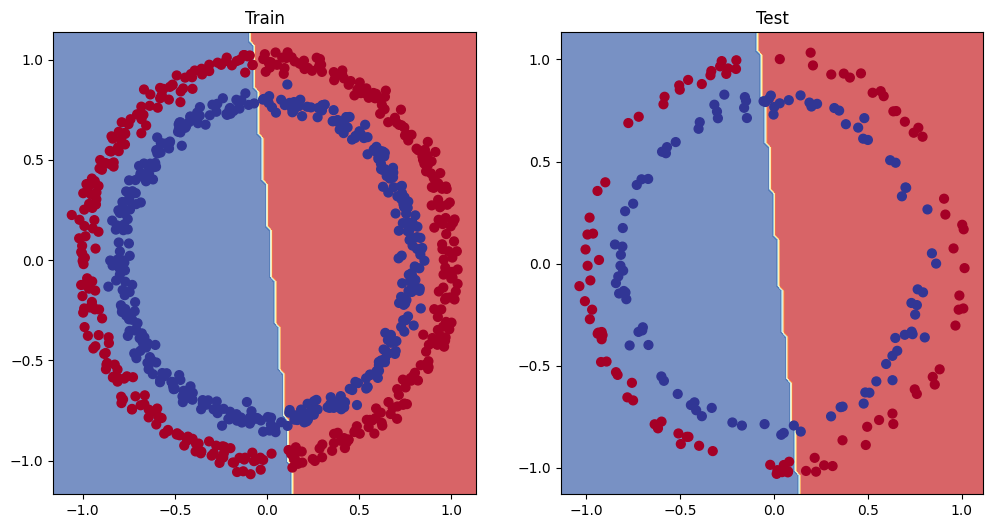

In [30]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)  #number of rows,number of columns, idx
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

###5.Improving a model(from a model perspective)

* Add more layers- give the model more chances to learn about patterns in the data

* Add more hidden units - go from 5 hidden units to 10 hidden units

* Fit for longer
* Change in the activation functions
* Change the learning rate
* Change the loss function

These options are all from model's perspectuve because they deal directly with the model, rather than the data.

And because these o[ptions arre all values we (as machine learning engineers and data scientist) can change they are referred to as hyperparameters.

In [31]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    # z=self.layer_1(x)
    # z=self.layer_2(z)
    # z=self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x))) #this way of writing operations leverages speed up where possibke behind the scene

model_1=CircleModelV1().to(device)
model_1



CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [32]:
# create a loss function
# create a optimizer
# write training and evaluation loop for model_1

In [33]:
epochs=1000
for epoch in range(epochs):
  model_1.train()
  y_logits=model_1(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))
  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_train,y_logits)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits=model_1(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_test,test_pred)
  if epoch%100==0:
    print("Epoch ",epoch, "loss",loss,"accuracy",acc,"test loss",test_loss,"test acc",test_acc)


Epoch  0 loss tensor(0.6933, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>) accuracy 0.0 test loss tensor(0.6952) test acc 50.0
Epoch  100 loss tensor(0.6933, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>) accuracy 0.0 test loss tensor(0.6952) test acc 50.0
Epoch  200 loss tensor(0.6933, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>) accuracy 0.0 test loss tensor(0.6952) test acc 50.0
Epoch  300 loss tensor(0.6933, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>) accuracy 0.0 test loss tensor(0.6952) test acc 50.0
Epoch  400 loss tensor(0.6933, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>) accuracy 0.0 test loss tensor(0.6952) test acc 50.0
Epoch  500 loss tensor(0.6933, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>) accuracy 0.0 test loss tensor(0.6952) test acc 50.0
Epoch  600 loss tensor(0.6933, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>) accuracy 0.0 test loss tensor(0.6952) test acc 50.0
Epoch  700 loss tensor(0.6933, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>

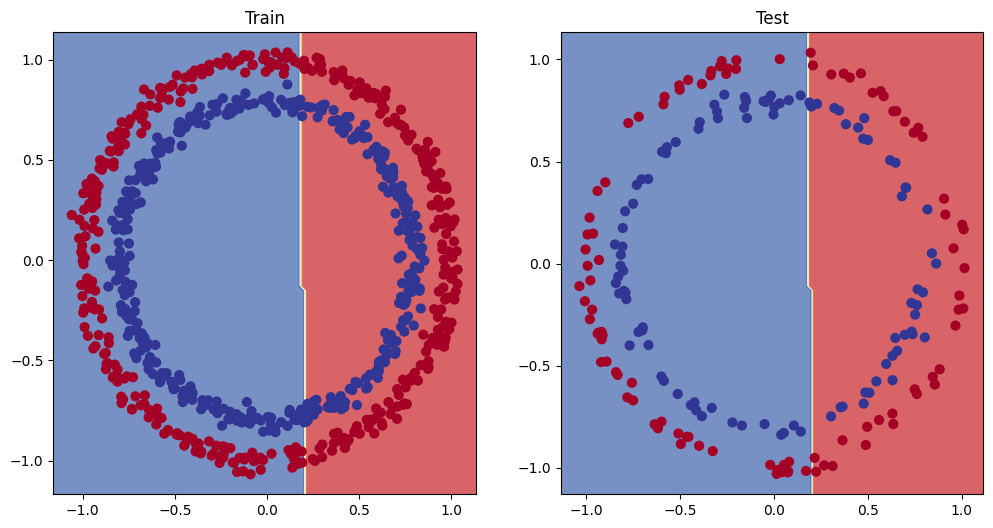

In [34]:
# plot the decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)

We analyze that this is linear which makes our data divide by line which is not required. so we move to another dataset for fitting this model to Linear Dataset.

###5.1 Preparing data to see if oir mdoel can fit a straight line
One way to troubleshoot to a larger problem is to test out a smaller problem.

In [35]:
# Create some data(same as notebook O1)
weight=0.7
bias=0.3
start=0
end=1
step=0.01

# create data
X_regression= torch.arange(start,end,step).unsqueeze(dim=1)
y_regression=weight*X_regression+bias  # linear regression formula

# checl the data
print(len(X_regression))
X_regression[:10],y_regression[:5]



100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [36]:
# create tarin and test split
train_split=int(0.8 *len(X_regression))
X_train_regression, y_train_regression=X_regression[:train_split],y_regression[:train_split]
X_test_regression,y_test_regression=X_regression[train_split:],y_regression[train_split:]

len(X_train_regression) ,len(X_test_regression),len(y_train_regression), len(y_test_regression)


(80, 20, 80, 20)

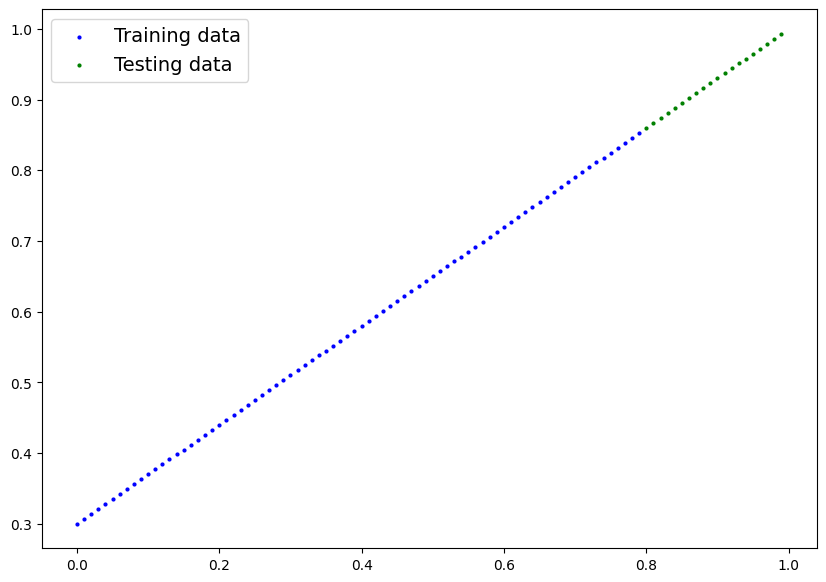

In [37]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression);

In [39]:
X_train_regression[:10], y_train_regression[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

In [38]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

###5.2 Adjusting modle_1 to fit a staright line

In [40]:
# same architecture as model 1 but using nn.Sequential()
model_2=nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [44]:
# loss and optimizer
loss_fn= nn.L1Loss()  #bcz we are doing lr
optimizer=torch.optim.SGD(model_2.parameters(),lr=0.01)



In [45]:
# train the model
torch.manual_seed(42)

# set the number of epoch
epochs=1000

# put the data on the target device
X_train_regression,y_train_regression=X_train_regression.to(device), y_train_regression.to(device)
X_test_regression,y_test_regression=X_test_regression.to(device),y_test_regression.to(device)


for epoch in range(epochs):
  y_pred=model_2(X_train_regression)
  loss=loss_fn(y_pred,y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # testing
  model_2.eval()
  with torch.inference_mode():
    test_pred=model_2(X_test_regression)
    test_loss=loss_fn(test_pred,y_test_regression)

  if epoch%100==0:
    print(f"Epoch: {epoch}  | loss :{loss:.5f} | test loss:{test_loss:.5f}" )



Epoch: 0  | loss :0.05325 | test loss:0.02637
Epoch: 100  | loss :0.00673 | test loss:0.00292
Epoch: 200  | loss :0.00653 | test loss:0.00142
Epoch: 300  | loss :0.00651 | test loss:0.00129
Epoch: 400  | loss :0.00649 | test loss:0.00132
Epoch: 500  | loss :0.00677 | test loss:0.00134
Epoch: 600  | loss :0.00675 | test loss:0.00135
Epoch: 700  | loss :0.00674 | test loss:0.00135
Epoch: 800  | loss :0.00672 | test loss:0.00135
Epoch: 900  | loss :0.00670 | test loss:0.00134


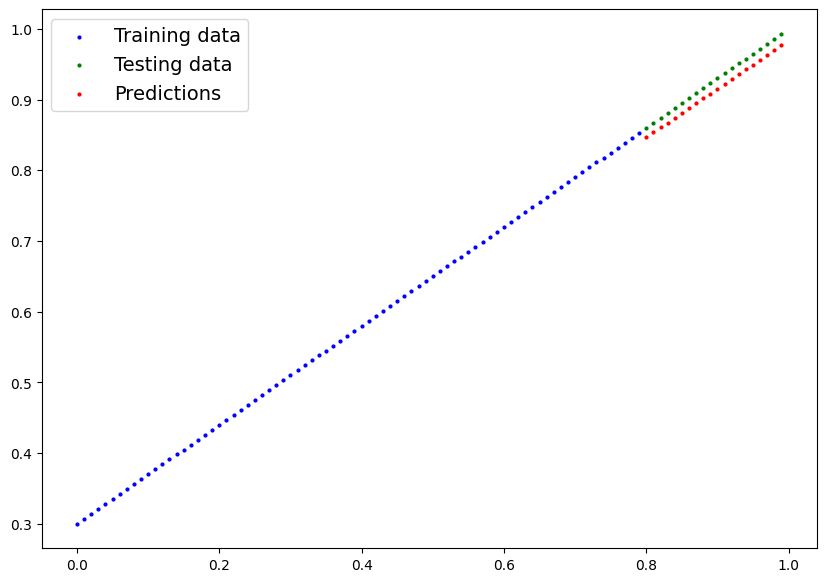

In [52]:
# plot prediction to know what is happening
model_2.eval()
with torch.inference_mode():
  y_preds=model_2(X_test_regression)

plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 predictions=y_preds);